# Assignment 03 - Pandas
*EMSE 6574 - Programming Analytics*

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate (Ex. Task 2)
  - Sample submission can be found on blackboard under the “outline” section
  - **Not following these standards may result in lost points**
 - For this assignment you will need to download **‘boston_housing_data.csv’** file from blackboard
 
*Note: Description of columns can be found on [kaggle](https://www.kaggle.com/c/boston-housing)*


## Task 1

Load the boston_housing_data.csv into a dataframe.

In [1]:
# Space for Task 1 Code
import pandas as pd
import numpy as np
"""
This loads the boston_housing_data.csv into the dataframe boston
and prints it out
"""
boston= pd.read_csv("boston_housing_data.csv")
print(boston)

     Crime/Capita  % Large Plots  % Non-Retail Business  Riverfront  \
0         0.00632           18.0                   2.31         0.0   
1         0.02731            0.0                   7.07         0.0   
2         0.02729            0.0                   7.07         0.0   
3         0.03237            0.0                   2.18         0.0   
4             NaN            0.0                   2.18         NaN   
5         0.02985            0.0                   2.18         0.0   
6         0.08829           12.5                   7.87         0.0   
7             NaN           12.5                   7.87         NaN   
8         0.21124           12.5                   7.87         0.0   
9         0.17004           12.5                   7.87         0.0   
10        0.22489           12.5                   7.87         0.0   
11        0.11747           12.5                   7.87         0.0   
12        0.09378           12.5                   7.87         0.0   
13    

## Task 2

Focusing on the **‘Median Value’** column, calculate the basic statistics (mean, median, std) for each NaN handling methodology (bfill, ffill, removal). Write a couple sentences analyzing how the methods compare, and discuss the risks involved with each approach.

*Include both code and comments below.*

In [2]:
# Space for Task 2 Code
"""
This part uses 3 type of NaN handling methodology and compares the mean,
median and standard deviation of the dataset after the NaNs are being handled
by the 3 methodologies
"""
median_value=boston['Median Value']
#print(median_value)
print("the results for mean with three ways")
print(np.mean(median_value.bfill()))
print(np.mean(median_value.ffill()))
print(np.mean(median_value.dropna()))
print()
print("The results for median with three ways")
print(np.median(median_value.bfill()))
print(np.median(median_value.ffill()))
print(np.median(median_value.dropna()))
print()
print("The results for standard deviation with three ways")
print(np.std(median_value.bfill()))
print(np.std(median_value.ffill()))
print(np.std(median_value.dropna()))
print()

the results for mean with three ways
22.445256916996048
22.43379446640316
22.238255033557046

The results for median with three ways
21.2
21.05
21.0

The results for standard deviation with three ways
9.105110151055143
9.211310725722978
9.092066487753591



**Task 2 Comments**

Space for Comments

The method bfill fills the NaNs backwards, which is to say that if the next value of the column is, let's say, 1, then the NaN before that next value, will be replaced by 1. The method ffill does the opposite, which means that if the value before the NaN is 1, then the NaN will be replaced by 1. They both assume that the occurrence of data is inertial. However, the method dropna directly drops all the NaNs, so when statistical characteristics are being calculated, NaNs are all gone. 
Risks:
bfill and ffill assume that there's a pattern within the data when the dataset can be completely random, but dropna gets rid of all the NaNs which might decrease the accuracy (also the randomness) of the dataset

## Task 3

Address the NaN’s in the **% Built Prior 1940** column. For each approach determine the correlation between **% Built Prior 1940** and **Median Value**. Write a couple sentences explaining how each approach effects how the two columns are correlated.

In [3]:
# Space for Task 3 Code
"""
This part prints out the correlations between median value and % built prior
1940 under 3 different kind of NaN handling methodology 
"""
built_prior=boston['% Built Prior 1940']
#print(built_prior)
print(median_value.bfill().corr(built_prior.bfill()))
print(median_value.ffill().corr(built_prior.ffill()))
print(median_value.dropna().corr(built_prior.dropna()))

-0.36925838697103713
-0.36496866065405287
-0.37150235515072727


**Task 3 Comments

Space for Comments

I can see small differences among the three correlations calculated. 
They are all negative, which means that they all prove that the increase of % built prior 1940 will affect the median value nagatively (or decrease the median value)
However, when all the NaNs are dropped from both median value and % built prior to 1940, the correlation between those two seem to be the strongest

## Task 4

Plot a (properly labeled) histogram of the **Avg # of rooms**.

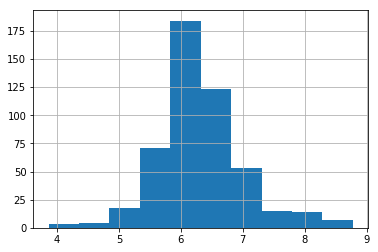

In [5]:
# Space for Task 4
"""
This prints out the histogram of the average number of rooms column
"""
avg_room=boston['Avg # Rooms']
#print(avg_room)
avg_room.hist()

## Task 5
Plot a (properly labelled) scatter plot between **% Built Prior 1940** and **% Large Plots**

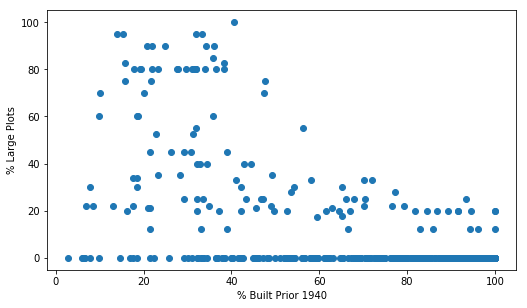

In [6]:
# Space for Task 5
"""
This plots a scatter plot between % built prior 1940 and % large plots with
labels
"""
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(18.5, 10.5)) # We can define the figure on init with the figsize parameter
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(boston['% Built Prior 1940'],boston['% Large Plots'] )
ax1.set_xlabel("% Built Prior 1940")
ax1.set_ylabel("% Large Plots")
plt.show()

## Task 6

Generate a new features for the dataset equal to the following equation:

$$\text{Riverfront Rooms} = 
\begin{cases}
\lceil \text{Avg # Rooms} \rceil/2,  & \text{if $Riverfront$ is 1} \\
0, & \text{if $Riverfront$ is 0}
\end{cases}
$$

*Note: $\lceil \text{#} \rceil$ means to take the ceiling of the # (e.g. $\lceil 3.2 \rceil = 4$)*

In [7]:
# Space for Task 6
"""
This creates a new column riverfront rooms and calculates the riverfront
rooms based on the formula stated above
"""
import math
river_front=boston['Riverfront']
boston['Riverfront Rooms'] = 0
#print(boston['Riverfront Rooms'][0])
#print(len(river_front))
lst=[]
for i in range(0,len(river_front)):
    if river_front[i]==1:
        boston['Riverfront Rooms'][i]=math.ceil(avg_room[i]/2)
        lst.append(math.ceil(avg_room[i]/2))
#print(lst)
print(boston)
print(boston['Riverfront Rooms'][163])        

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


     Crime/Capita  % Large Plots  % Non-Retail Business  Riverfront  \
0         0.00632           18.0                   2.31         0.0   
1         0.02731            0.0                   7.07         0.0   
2         0.02729            0.0                   7.07         0.0   
3         0.03237            0.0                   2.18         0.0   
4             NaN            0.0                   2.18         NaN   
5         0.02985            0.0                   2.18         0.0   
6         0.08829           12.5                   7.87         0.0   
7             NaN           12.5                   7.87         NaN   
8         0.21124           12.5                   7.87         0.0   
9         0.17004           12.5                   7.87         0.0   
10        0.22489           12.5                   7.87         0.0   
11        0.11747           12.5                   7.87         0.0   
12        0.09378           12.5                   7.87         0.0   
13    

## Task 7

Group the dataframe by the **Property Tax** column and calculate the **mean** and **median Median Value** for each group. How does the number of rooms per house affect the mean median value of the houses?

In a couple of sentences write what the relationship between **Avg # of Rooms** and **Median Value** means.

In [9]:
# Space for Task 7 code
"""
This group the mean of Median Value by Property Tax and the median of Median
Value by Property Tax and also the mean of Median Value by the average room 
number so that we can see the relationship between average number of rooms
and the mean median value
"""
grouped_mean= boston['Median Value'].groupby(boston['Avg # Rooms']).mean()
#for name,group in grouped:
#    print(name)
#    print(group)
print(grouped_mean)
print()
print("*********")
print()
grouped_median=boston['Median Value'].groupby(boston['Avg # Rooms']).median()
print(grouped_median)
print()
print("How room number affects median value")
grouped_by_room_num=boston['Median Value'].groupby(avg_room).mean()
print(grouped_by_room_num)


Avg # Rooms
3.863    23.10
4.138    12.85
4.368     8.80
4.519     7.00
4.628    17.90
4.652    10.50
4.880    10.20
4.903    11.80
4.906    13.80
4.926    14.60
4.963    21.90
4.970    50.00
4.973    16.10
5.000     7.40
5.012    15.30
5.019    14.40
5.036     9.70
5.093     8.10
5.155    16.30
5.186    17.80
5.272    13.10
5.277     7.20
5.304    11.20
5.344    20.00
5.349     8.30
5.362    20.80
5.390    15.60
5.399    14.40
5.403    13.40
5.404    19.45
         ...  
7.412    31.70
7.416    33.20
7.420      NaN
7.454    44.00
7.470      NaN
7.489    50.00
7.520    43.10
7.645      NaN
7.691    35.20
7.765    39.80
7.802      NaN
7.820    45.40
7.831    50.00
7.853    48.50
7.875    50.00
7.923    50.00
7.929    50.00
8.034    50.00
8.040    37.60
8.069    38.70
8.247      NaN
8.259    42.80
8.266    44.80
8.297    50.00
8.337    41.70
8.375    50.00
8.398    48.80
8.704      NaN
8.725    50.00
8.780    21.90
Name: Median Value, Length: 433, dtype: float64

*********

Avg # Rooms
3

From the mean Median Value data grouped by room number, I can see that overall there's an increasing tendency, which means that with the increase of room number, there's also an increase of mean Median Value, but it's not necessarily true to every single group of the data either, like how when the average room number is 3.8, the mean median value can be 23, while when the average room number is 5, the mean median value can be 7.4